In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [29]:
df_train = pd.read_csv('used training data.csv')
df_test = pd.read_csv('used testing data.csv')

In [30]:
df_train.head()

,Td,T1,T2,T3,T4,T5,T6,T7,B1,B2,...,A27,A28,A29,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
df_train.columns

Index(['Td', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'B1', 'B2', 'B3', 'B4',
       'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15',
       'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25',
       'B26', 'B27', 'B28', 'B29', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
       'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27',
       'A28', 'A29', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday'],
      dtype='object')

In [32]:
trainY = df_train['Td']
trainX = df_train[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'B1', 'B2', 'B3', 'B4',
       'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15',
       'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25',
       'B26', 'B27', 'B28', 'B29', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
       'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27',
       'A28', 'A29', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday']]
testY = df_test['Td']
testX = df_test[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'B1', 'B2', 'B3', 'B4',
       'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15',
       'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25',
       'B26', 'B27', 'B28', 'B29', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
       'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27',
       'A28', 'A29', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday']]

In [33]:
from sklearn.decomposition import PCA
pca = PCA()
data_onehot = pca.fit_transform(trainX)

[]

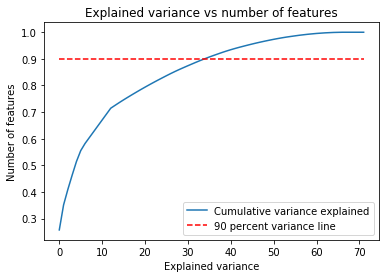

In [34]:
plt.plot(range(0,trainX.shape[1]),np.cumsum(pca.explained_variance_ratio_),label = 'Cumulative variance explained')
plt.plot(range(0,trainX.shape[1]),0.9*np.ones(trainX.shape[1]),'--r',label = '90 percent variance line')
plt.title('Explained variance vs number of features')
plt.xlabel('Explained variance')
plt.ylabel('Number of features')
plt.legend()
plt.plot()

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
trainX = pca.fit_transform(trainX)
testX = pca.transform(testX)

In [36]:
print(pca.explained_variance_ratio_.shape)

(10,)


1.5672061928219563
1.5672061928219563
-2.9406116142918024
-2.9406116142918024


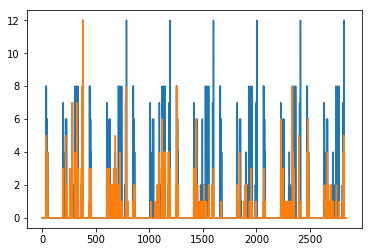

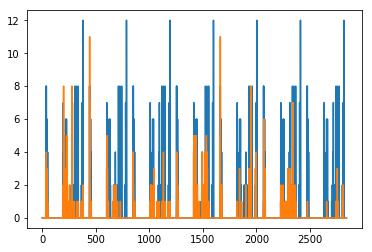

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(trainX,trainY)
print (mean_squared_error(trainY,model.predict(trainX)))
print(mean_squared_error(trainY,model.predict(trainX)))
print(r2_score(testY,model.predict(testX)))
print(r2_score(testY,model.predict(testX)))
plt.plot(range(0,trainY.shape[0]),model.predict(trainX))
plt.plot(range(0,trainY.shape[0]),trainY)
plt.show()
plt.plot(range(0,testY.shape[0]),model.predict(testX))
plt.plot(range(0,testY.shape[0]),testY)
plt.show()

0.33006653202846625
0.36968867228190005
0.38429856449899535
0.20026576978109745
Training data plot


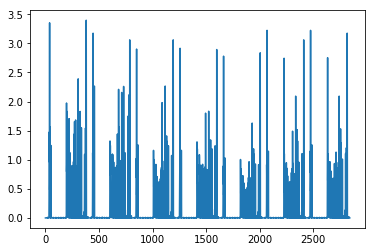

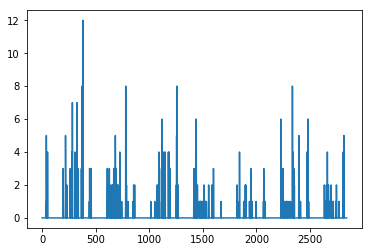

Testing data plot


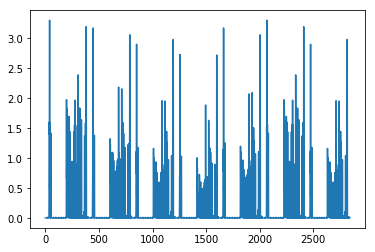

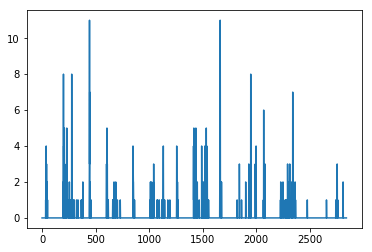

In [38]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=33,min_samples_split=97,max_depth = 5)
model.fit(trainX,trainY)
print (mean_squared_error(trainY,model.predict(trainX)))
print(mean_squared_error(testY,model.predict(testX)))
print(r2_score(trainY,model.predict(trainX)))
print(r2_score(testY,model.predict(testX)))
print('Training data plot')
plt.plot(range(0,trainY.shape[0]),model.predict(trainX))
plt.show()
plt.plot(range(0,trainY.shape[0]),trainY)
plt.show()
print('Testing data plot')
plt.plot(range(0,testY.shape[0]),model.predict(testX))
plt.show()
plt.plot(range(0,testY.shape[0]),testY)
plt.show()

In [39]:
sum(trainX==testX)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

0.3838838448872237
0.37726736106293357
0.2839085110806563
0.18387106447147195
Training data plot


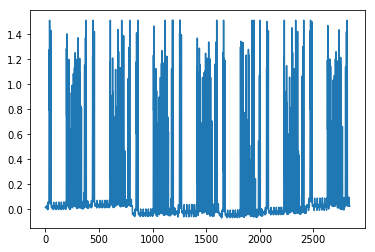

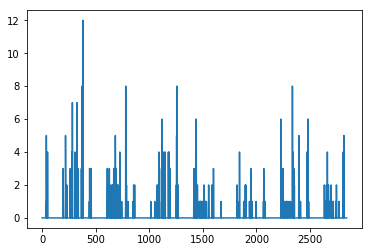

Testing data plot


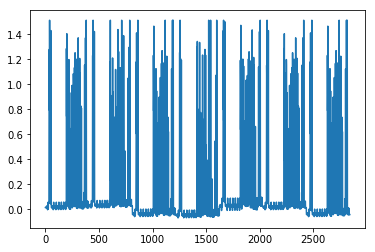

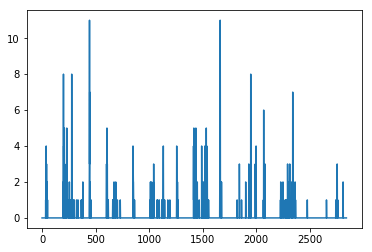

In [40]:
from sklearn.neural_network import MLPRegressor
model  = MLPRegressor(hidden_layer_sizes=(3,5,2),random_state=1234,solver='adam',activation='relu',max_iter=2000)
model.fit(trainX,trainY)
print (mean_squared_error(trainY,model.predict(trainX)))
print(mean_squared_error(testY,model.predict(testX)))
print(r2_score(trainY,model.predict(trainX)))
print(r2_score(testY,model.predict(testX)))
print('Training data plot')
plt.plot(range(0,trainY.shape[0]),model.predict(trainX))
plt.show()
plt.plot(range(0,trainY.shape[0]),trainY)
plt.show()
print('Testing data plot')
plt.plot(range(0,testY.shape[0]),model.predict(testX))
plt.show()
plt.plot(range(0,testY.shape[0]),testY)
plt.show()

0.3782591167862322
0.3671895477138455
0.2944007992408646
0.20567203622231045
Training data plot


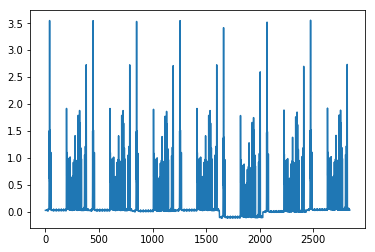

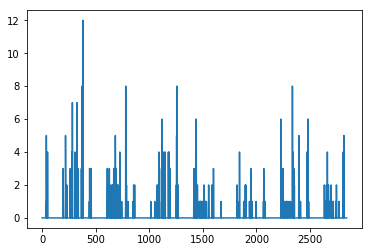

Testing data plot


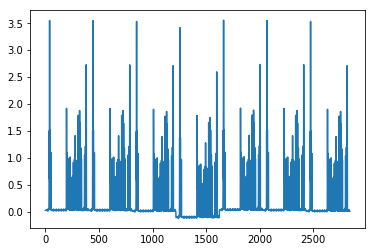

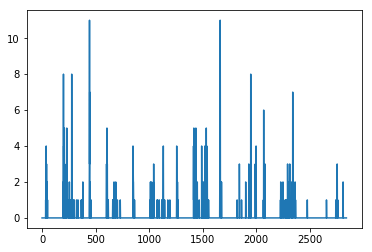

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(trainX,trainY)
print (mean_squared_error(trainY,model.predict(trainX)))
print(mean_squared_error(testY,model.predict(testX)))
print(r2_score(trainY,model.predict(trainX)))
print(r2_score(testY,model.predict(testX)))
print('Training data plot')
plt.plot(range(0,trainY.shape[0]),model.predict(trainX))
plt.show()
plt.plot(range(0,trainY.shape[0]),trainY)
plt.show()
print('Testing data plot')
plt.plot(range(0,testY.shape[0]),model.predict(testX))
plt.show()
plt.plot(range(0,testY.shape[0]),testY)
plt.show()

In [42]:
from sklearn.decomposition import PCA

a = []
model = RandomForestRegressor(n_estimators=33,min_samples_split=97,max_depth = 5)
for i in range(1,70):
    trainY = df_train['Td']
    trainX = df_train[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'B1', 'B2', 'B3', 'B4',
           'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15',
           'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25',
           'B26', 'B27', 'B28', 'B29', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
           'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
           'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27',
           'A28', 'A29', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
           'Saturday', 'Sunday']]
    testY = df_test['Td']
    testX = df_test[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'B1', 'B2', 'B3', 'B4',
           'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15',
           'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25',
           'B26', 'B27', 'B28', 'B29', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
           'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
           'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27',
           'A28', 'A29', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
           'Saturday', 'Sunday']]
    pca = PCA(n_components=i)
    trainX = pca.fit_transform(trainX)
    testX = pca.transform(testX)
    model.fit(trainX,trainY)
    print('no. of features = ',i)
    print (mean_squared_error(trainY,model.predict(trainX)))
    print(mean_squared_error(testY,model.predict(testX)))
    print(r2_score(trainY,model.predict(trainX)))
    print(r2_score(testY,model.predict(testX)))
    print('**********************************')
    a.append([mean_squared_error(trainY,model.predict(trainX)),mean_squared_error(testY,model.predict(testX)),
             r2_score(trainY,model.predict(trainX)),r2_score(testY,model.predict(testX))])
a = np.array(a)

no. of features =  1
0.3585197454791833
0.36161208931300987
0.33122234299128994
0.21773755170926856
**********************************
no. of features =  2
0.35048259126004433
0.3568894148745935
0.34621473667523983
0.22795394374332412
**********************************
no. of features =  3
0.3521377966468503
0.35956058110653943
0.3431271399824085
0.22217550574816958
**********************************
no. of features =  4
0.35173801096423185
0.3576013590114346
0.3438728945342807
0.22641382055610015
**********************************
no. of features =  5
0.348024019574757
0.35886487676965545
0.3508009214865584
0.22368049795927425
**********************************
no. of features =  6
0.3373176074969131
0.3695225240463807
0.3707725109866574
0.20062519229305908
**********************************
no. of features =  7
0.3478151308544879
0.36140944271686304
0.35119057954773547
0.2181759298142173
**********************************
no. of features =  8
0.33673034187577494
0.3552913350094345
0.

no. of features =  62
0.3266696496591047
0.3777271800916806
0.39063506077503574
0.18287635447745143
**********************************
no. of features =  63
0.3295894623396827
0.37302680907478436
0.3851884835417194
0.19304449832058845
**********************************
no. of features =  64
0.3261519134503811
0.37387491685863955
0.3916008385682671
0.19120981720505004
**********************************
no. of features =  65
0.3268540402833336
0.3706110642953725
0.3902911011153486
0.19827039225897536
**********************************
no. of features =  66
0.32891639269987744
0.378423142976764
0.38644401811795603
0.18137080295831076
**********************************
no. of features =  67
0.3275535849919299
0.37134063090476677
0.38898618032064425
0.19669214700965265
**********************************
no. of features =  68
0.32648240807546647
0.3756312662790477
0.390984338574039
0.18741036956967738
**********************************
no. of features =  69
0.33114243573070506
0.377070476287

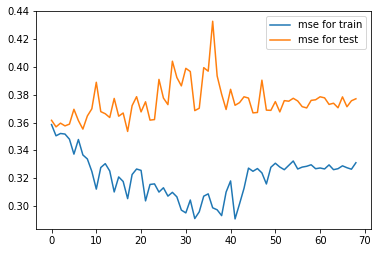

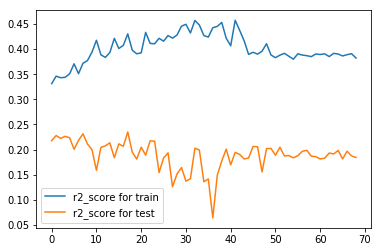

In [43]:
plt.plot(range(69),a[:,0],label = 'mse for train')
plt.plot(range(69),a[:,1],label = 'mse for test')
plt.legend()
plt.show()
plt.plot(range(69),a[:,2],label = 'r2_score for train')
plt.plot(range(69),a[:,3],label = 'r2_score for test')
plt.legend()
plt.show()

In [44]:
### best model
print('no of features = ',np.argmin(a[:,1])+1)
print('mse for train = ',a[np.argmin(a[:,1])][0])
print('mse for test = ',a[np.argmin(a[:,1])][1])
print('r2_score for train = ',a[np.argmin(a[:,1])][2])
print('r2_score for test = ',a[np.argmin(a[:,1])][3])

no of features =  18
mse for train =  0.30535723984540375
mse for test =  0.353613237877952
r2_score for train =  0.4303909282834375
r2_score for test =  0.23504117980143113


In [45]:
from sklearn.decomposition import PCA

a = []
model = LinearRegression()
for i in range(1,70):
    trainY = df_train['Td']
    trainX = df_train[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'B1', 'B2', 'B3', 'B4',
           'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15',
           'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25',
           'B26', 'B27', 'B28', 'B29', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
           'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
           'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27',
           'A28', 'A29', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
           'Saturday', 'Sunday']]
    testY = df_test['Td']
    testX = df_test[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'B1', 'B2', 'B3', 'B4',
           'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15',
           'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25',
           'B26', 'B27', 'B28', 'B29', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
           'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
           'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27',
           'A28', 'A29', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
           'Saturday', 'Sunday']]
    pca = PCA(n_components=i)
    trainX = pca.fit_transform(trainX)
    testX = pca.transform(testX)
    model.fit(trainX,trainY)
    print('no. of features = ',i)
    print (mean_squared_error(trainY,model.predict(trainX)))
    print(mean_squared_error(testY,model.predict(testX)))
    print(r2_score(trainY,model.predict(trainX)))
    print(r2_score(testY,model.predict(testX)))
    print('**********************************')
    a.append([mean_squared_error(trainY,model.predict(trainX)),mean_squared_error(testY,model.predict(testX)),
             r2_score(trainY,model.predict(trainX)),r2_score(testY,model.predict(testX))])
a = np.array(a)

no. of features =  1
0.3895008588097371
0.3668413619393432
0.27343061283975745
0.2064252540058742
**********************************
no. of features =  2
0.38895126201553204
0.36181986351187134
0.2744558229180384
0.2172880812454857
**********************************
no. of features =  3
0.38881351713642476
0.36282058778527415
0.27471277026522334
0.2151232503581576
**********************************
no. of features =  4
0.38327586348633275
0.358488783465787
0.2850426309775932
0.22449408709903107
**********************************
no. of features =  5
0.3822479999203807
0.35973474814197903
0.28695999312020903
0.22179873645427406
**********************************
no. of features =  6
0.3811045004330002
0.35961826484618914
0.2890930608733919
0.22205072058545372
**********************************
no. of features =  7
0.38028926633188387
0.36280386305181833
0.29061378702288054
0.21515943037350227
**********************************
no. of features =  8
0.37992215866643597
0.362943472465118
0

0.3657336738389251
0.37747493262557336
0.31776558316957215
0.1834220323633513
**********************************
no. of features =  63
0.36573362739098175
0.3774725992465279
0.3177656698129079
0.18342708007845498
**********************************
no. of features =  64
0.36573358509046777
0.3774713603186859
0.3177657487196879
0.18342976020656898
**********************************
no. of features =  65
0.36573353540551995
0.3774681810568396
0.31776584140128605
0.1834366377895622
**********************************
no. of features =  66
0.36573353540551995
0.3774681810568397
0.31776584140128605
0.1834366377895621
**********************************
no. of features =  67
0.3657335332491643
0.3774681794407911
0.3177658454237213
0.18343664128550208
**********************************
no. of features =  68
0.36571999120163834
0.3778028424447642
0.31779110656743714
0.18271267682585768
**********************************
no. of features =  69
0.3657192971507016
0.3776815573367329
0.317792401240227

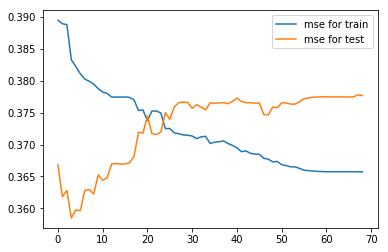

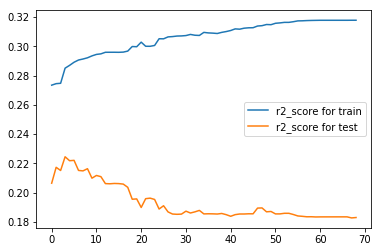

In [46]:
plt.plot(range(69),a[:,0],label = 'mse for train')
plt.plot(range(69),a[:,1],label = 'mse for test')
plt.legend()
plt.show()
plt.plot(range(69),a[:,2],label = 'r2_score for train')
plt.plot(range(69),a[:,3],label = 'r2_score for test')
plt.legend()
plt.show()

In [47]:
### best model
print('no of features = ',np.argmin(a[:,1])+1)
print('mse for train = ',a[np.argmin(a[:,1])][0])
print('mse for test = ',a[np.argmin(a[:,1])][1])
print('r2_score for train = ',a[np.argmin(a[:,1])][2])
print('r2_score for test = ',a[np.argmin(a[:,1])][3])

no of features =  4
mse for train =  0.38327586348633275
mse for test =  0.358488783465787
r2_score for train =  0.2850426309775932
r2_score for test =  0.22449408709903107


In [48]:
from sklearn.decomposition import TruncatedSVD

a = []
model = LinearRegression()
for i in range(1,70):
    trainY = df_train['Td']
    trainX = df_train[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'B1', 'B2', 'B3', 'B4',
           'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15',
           'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25',
           'B26', 'B27', 'B28', 'B29', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
           'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
           'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27',
           'A28', 'A29', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
           'Saturday', 'Sunday']]
    testY = df_test['Td']
    testX = df_test[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'B1', 'B2', 'B3', 'B4',
           'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15',
           'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25',
           'B26', 'B27', 'B28', 'B29', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
           'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
           'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27',
           'A28', 'A29', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
           'Saturday', 'Sunday']]
    pca = TruncatedSVD(n_components=i)
    trainX = pca.fit_transform(trainX)
    testX = pca.transform(testX)
    model.fit(trainX,trainY)
    print('no. of features = ',i)
    print (mean_squared_error(trainY,model.predict(trainX)))
    print(mean_squared_error(testY,model.predict(testX)))
    print(r2_score(trainY,model.predict(trainX)))
    print(r2_score(testY,model.predict(testX)))
    print('**********************************')
    a.append([mean_squared_error(trainY,model.predict(trainX)),mean_squared_error(testY,model.predict(testX)),
             r2_score(trainY,model.predict(trainX)),r2_score(testY,model.predict(testX))])
a = np.array(a)

no. of features =  1
0.3892391300993763
0.36768480834816325
0.273918837870301
0.2046006566755717
**********************************
no. of features =  2
0.3885655135712251
0.36206260045237987
0.2751753926043148
0.216762977138116
**********************************
no. of features =  3
0.3883763178719567
0.3632371924938885
0.27552831558294655
0.21422202435116966
**********************************
no. of features =  4
0.3827541676985788
0.35881542210251527
0.28601579491348494
0.22378748146491412
**********************************
no. of features =  5
0.38205378109979377
0.35986083312759737
0.2873222861582271
0.22152598133225965
**********************************
no. of features =  6
0.3811169761318388
0.35975020252798046
0.2890697888814193
0.22176530453596277
**********************************
no. of features =  7
0.381019456936087
0.36060544779900516
0.28925169980842025
0.21991518315071856
**********************************
no. of features =  8
0.38023716407282965
0.36264948738645114
0.2

no. of features =  63
0.3657336262140999
0.37747197279639133
0.3177656720082468
0.1834284352555412
**********************************
no. of features =  64
0.36573362117347685
0.37747195853263094
0.3177656814109535
0.18342846611182184
**********************************
no. of features =  65
0.36573354873942815
0.37746905615820325
0.3177658165284024
0.18343474471420484
**********************************
no. of features =  66
0.3657335332491643
0.37746817944079136
0.3177658454237213
0.1834366412855014
**********************************
no. of features =  67
0.3657335332491643
0.37746817944079136
0.3177658454237213
0.1834366412855014
**********************************
no. of features =  68
0.3657166924298774
0.37926001191390896
0.3177972600495733
0.17956043443630365
**********************************
no. of features =  69
0.3656969409354718
0.37545685160755693
0.3178341042075802
0.1877876745657504
**********************************


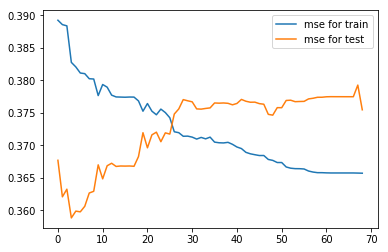

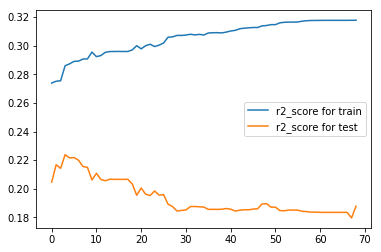

In [49]:
plt.plot(range(69),a[:,0],label = 'mse for train')
plt.plot(range(69),a[:,1],label = 'mse for test')
plt.legend()
plt.show()
plt.plot(range(69),a[:,2],label = 'r2_score for train')
plt.plot(range(69),a[:,3],label = 'r2_score for test')
plt.legend()
plt.show()

In [50]:
### best model
print('no of features = ',np.argmin(a[:,1])+1)
print('mse for train = ',a[np.argmin(a[:,1])][0])
print('mse for test = ',a[np.argmin(a[:,1])][1])
print('r2_score for train = ',a[np.argmin(a[:,1])][2])
print('r2_score for test = ',a[np.argmin(a[:,1])][3])

no of features =  4
mse for train =  0.3827541676985788
mse for test =  0.35881542210251527
r2_score for train =  0.28601579491348494
r2_score for test =  0.22378748146491412


In [51]:
from sklearn.decomposition import PCA

a = []
model = RandomForestRegressor(n_estimators=33,min_samples_split=97,max_depth = 5)
for i in range(1,70):
    trainY = df_train['Td']
    trainX = df_train[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'B1', 'B2', 'B3', 'B4',
           'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15',
           'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25',
           'B26', 'B27', 'B28', 'B29', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
           'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
           'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27',
           'A28', 'A29', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
           'Saturday', 'Sunday']]
    testY = df_test['Td']
    testX = df_test[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'B1', 'B2', 'B3', 'B4',
           'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15',
           'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25',
           'B26', 'B27', 'B28', 'B29', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
           'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
           'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27',
           'A28', 'A29', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
           'Saturday', 'Sunday']]
    pca = PCA(n_components=i)
    trainX = pca.fit_transform(trainX)
    testX = pca.transform(testX)
    model.fit(trainX,trainY)
    print('no. of features = ',i)
    print (mean_squared_error(trainY,model.predict(trainX)))
    print(mean_squared_error(testY,model.predict(testX)))
    print(r2_score(trainY,model.predict(trainX)))
    print(r2_score(testY,model.predict(testX)))
    print('**********************************')
    a.append([mean_squared_error(trainY,model.predict(trainX)),mean_squared_error(testY,model.predict(testX)),
             r2_score(trainY,model.predict(trainX)),r2_score(testY,model.predict(testX))])
a = np.array(a)

no. of features =  1
0.3568798728913771
0.36312615712338076
0.33428133809796123
0.2144622231812069
**********************************
no. of features =  2
0.3531980733023239
0.36776996635747256
0.34114931492152945
0.20441643741182858
**********************************
no. of features =  3
0.3498365597333277
0.36207603339420025
0.34741983473814797
0.21673391813741683
**********************************
no. of features =  4
0.35310234805882645
0.3592024546898424
0.34132787943539544
0.22295022776605122
**********************************
no. of features =  5
0.34922120596231065
0.3619111373569489
0.34856770694993444
0.21709063181382837
**********************************
no. of features =  6
0.3506559864962582
0.35899763549566477
0.34589128765667443
0.22339330577430794
**********************************
no. of features =  7
0.3457380621813118
0.3572245301139852
0.35506511404188534
0.22722900097903742
**********************************
no. of features =  8
0.33975678315898034
0.36644253273231

no. of features =  62
0.3277636256746028
0.38803742749159204
0.3885943734051095
0.16057256649054974
**********************************
no. of features =  63
0.3289602508438862
0.37240754828239686
0.38636220575710056
0.19438412295676644
**********************************
no. of features =  64
0.327956767588279
0.3769225994620698
0.38823408921399494
0.18461687486315637
**********************************
no. of features =  65
0.3289978329227547
0.3670894785414764
0.3862921006792963
0.20588851226968108
**********************************
no. of features =  66
0.3231181863915472
0.385254667459286
0.39725991006989136
0.16659241134698943
**********************************
no. of features =  67
0.33319027382275146
0.37525009543376536
0.3784715807843605
0.188234942772454
**********************************
no. of features =  68
0.32519618172712017
0.37728011170110604
0.3933836469928269
0.18384348147375462
**********************************
no. of features =  69
0.32817877194665857
0.3716720808734

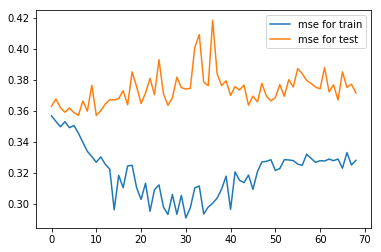

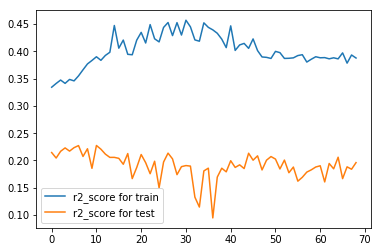

In [52]:
plt.plot(range(69),a[:,0],label = 'mse for train')
plt.plot(range(69),a[:,1],label = 'mse for test')
plt.legend()
plt.show()
plt.plot(range(69),a[:,2],label = 'r2_score for train')
plt.plot(range(69),a[:,3],label = 'r2_score for test')
plt.legend()
plt.show()

In [53]:
### best model
print('no of features = ',np.argmin(a[:,1])+1)
print('mse for train = ',a[np.argmin(a[:,1])][0])
print('mse for test = ',a[np.argmin(a[:,1])][1])
print('r2_score for train = ',a[np.argmin(a[:,1])][2])
print('r2_score for test = ',a[np.argmin(a[:,1])][3])

no of features =  11
mse for train =  0.326943081594347
mse for test =  0.35713613180063714
r2_score for train =  0.39012500471450196
r2_score for test =  0.22742022987615707
